In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import choice

In [86]:
def sigmoid(x):
    '''The logistic function as the sigmoid'''
    return 1.0/(1.0 + np.exp(-x))

def sigmoid_pr(z):
    '''derivative of the logistic function'''
    return z * (1 - z)

def tanh_prime(x):
    '''derivative of tanh'''
    return 1.0 - pow(np.tanh(x), 2)

In [112]:
class NeuralNetwork:
    def __init__(self, layers, activation='sigmoid'):
        # layers = [2,2,1] --> [2 inputs, 2 neurons for hidden layer 1, 1 neuron for the last layer]
        self.layers = layers
        if activation == 'sigmoid':
          self.activation = sigmoid
          self.activation_pr = sigmoid_pr`
        elif activation == 'tanh':
          self.activation = np.tanh
          self.activation_pr = tanh_prime

        # Initialize W; randomly generate w per layer
        self.W = []
        for l in range(len(layers) - 2):                                    # num_layer - 2 --> the output layer will not have weights; the last hidden layer will be initialized outside the loop
            self.W.append(np.random.normal(size=[layers[l]+1,               # layers[l]+1   --> adds weight for the bias node of the l'th layer
                                            layers[l]+1]))                  # layers[l+1]+1 --> adds weight for the bias node of the (l+1)'th layer

        self.W.append(np.random.normal(size=[layers[-2]+1,                  # layers[-2]+1  --> adds weight for the bias node to last hidden layer
                                        layers[-1]]))                       # layers[-1]    --> omits weight for the bias node in the output layer
        print(self.W)

    def fit(self, X, y, learning_rate=0.2, steps=100000, tol=1e-2):
        np.random.seed(21)
        layers = self.layers
        num_layers = len(layers)
        range_all_layers = range(len(layers) - 1)
        error_hist = []
        W = self.W

        # Initialize training_data; combine X, bias, and y
        training_data = []
        for i in range(layers[0]):                                          # iterate over b inputs
            training_data.append((np.concatenate((X[i], np.array([1]))),    # [0, 0], [1] -concatenate-> array([0, 0, 1])
                                                  y[0][i]))                 # [0, 1, 1], 0 --append----> (array([0, 0, 1]), 0)

        # Begin training
        for step in range(steps):

            # Select data to train on x_train and target
            x_train, target = choice(training_data)

            # A list of node outputs, starting with x_train as the a_0'th layer
            A = [x_train]

            # Forward prop
            # ------------
            for l in range_all_layers:                                      # num_layers-1  --> a_0 was initialized above
                A.append(self.activation(np.dot(A[l], W[l])))               # append new output to A

            # Update the output to check error
            z = A[-1]

            # Calculate error
            error = (target - z)
            error_hist.append(error)

            if np.abs(error) <= tol:
              print(f'Converged after {step} epochs')
              break

            # Backprop
            # --------
            for l in reversed(range_all_layers):                            # iterates through l = 2, 1, 0
                # print(f"| Backprop for the {l}th layer |")

                # update delta_l
                if l == (num_layers-2):                                     # if on the last layer L-1, initialize delta_L-1
                    delta_l = error * self.activation_pr(z)                         # delta1
                    # print(f'\tdelta_1: {delta_l}')
                else:                                                       # update current delta_l
                    delta_l = self.activation_pr(A[l+1]) * np.dot(W[l+1], delta_l)  # must confirm if these are the right deltas
                    # print(f'\tnew delta: {delta_l}')

                W[l] += learning_rate * np.atleast_2d(delta_l) * np.atleast_2d(A[l]).T

        return W, error_hist

    def predict(self,x):
      # one epoch is going through each element in the dataset
      x_test, target = choice(x)
      W = self.W
      A = [x_test]
      layers = self.layers
      rmse = []

      # Forward prop
      # ------------
      for l in range(len(layers) - 1):                                              # num_layers-1  --> a_0 was initialized above
          A.append(self.activation(np.dot(A[l], W[l])))                       # append new output to A

      # Update the output to check error
      z = A[-1]

      # Calculate error
      error = (target - z)
      rmse.append(error)

      return z

    # def find_RMSE_error(self, X, y):
    #   self.W


    #   num = 0
    #   ysum = 0

    #   for x in dubs[1]:
    #       num += pow(x,2)
    #   for yvalues in y:
    #       ysum += yvalues()

    #   num = np.sqrt(num/ysum)
    #   return sum

    """
    def find_RMSE_error(self, X, y):
    def predict(self, x):
    def visual_NN_boundaries(self, Nsamp=2000):
    """

In [111]:
X = np.array([[0,0],
            [0,1],
            [1,0],
            [1,1]])
y = np.array([[0, 1, 1, 0]])

n_steps = 10000

nn = NeuralNetwork([2,2,1], activation='tanh') #__init__
dubs, error_hist = nn.fit(X,y, learning_rate=.2, steps=n_steps)
print(f'error: {error_hist[-1]}')

[array([[-0.05196425, -0.11119605,  1.0417968 ],
       [-1.25673929,  0.74538768, -1.71105376],
       [-0.20586438, -0.23457129,  1.12814404]]), array([[-0.01262595],
       [-0.61320029],
       [ 1.3736885 ]])]
error: [0.00051743]


In [ ]:
nn.find_RMSE_error()

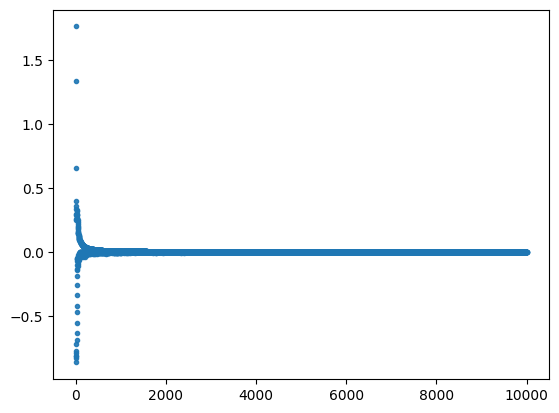

In [108]:
plt.plot(np.linspace(0,n_steps,n_steps),error_hist, '.', alpha=0.9)
plt.show()